In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime


data = pd.read_csv(r'C:\Users\nadia\OneDrive\Desktop\11_University of Patras.csv')
data['datetime'] = pd.to_datetime(data['datetime'], format='%d-%m-%y %H:%M')

data['month'] = data['datetime'].dt.month
data['hour'] = data['datetime'].dt.hour

print(data)

                datetime     PM2.5  month  hour
0    2020-01-01 00:00:00  4.061770      1     0
1    2020-01-01 01:00:00  3.522560      1     1
2    2020-01-01 02:00:00  2.972290      1     2
3    2020-01-01 03:00:00  2.924620      1     3
4    2020-01-01 04:00:00  3.846485      1     4
...                  ...       ...    ...   ...
8779 2020-12-31 19:00:00  5.299247     12    19
8780 2020-12-31 20:00:00  3.286940     12    20
8781 2020-12-31 21:00:00  2.117047     12    21
8782 2020-12-31 22:00:00  3.290510     12    22
8783 2020-12-31 23:00:00  2.203778     12    23

[8784 rows x 4 columns]


In [75]:
January = data[data['PM2.5'].gt(0) & data["month"].eq(1)]
February = data[data['PM2.5'].gt(0) & data["month"].eq(2)]
March = data[data['PM2.5'].gt(0) & data["month"].eq(3)]
April = data[data['PM2.5'].gt(0) & data["month"].eq(4)]
May = data[data['PM2.5'].gt(0) & data["month"].eq(5)]
June = data[data['PM2.5'].gt(0) & data["month"].eq(6)]
July = data[data['PM2.5'].gt(0) & data["month"].eq(7)]
August = data[data['PM2.5'].gt(0) & data["month"].eq(8)]
September = data[data['PM2.5'].gt(0) & data["month"].eq(9)]
November = data[data['PM2.5'].gt(0) & data["month"].eq(10)]
October = data[data['PM2.5'].gt(0) & data["month"].eq(11)]
December = data[data['PM2.5'].gt(0) & data["month"].eq(12)]

In [2]:
def pm(x,y,col):
    plt.figure(figsize=(10,10))
    plt.xlabel("DATEtime")
    plt.ylabel("PM concentracion (μg/m3)")

    plt.plot(x,y,color=col)

In [15]:
def statistics(x):
    print("the min value is", min(data[x]))
    print("the max value is", max(data[x]))
    print("the mean value is", np.mean(data[x]))
    print("the standard deviation value is", np.std(data[x]))

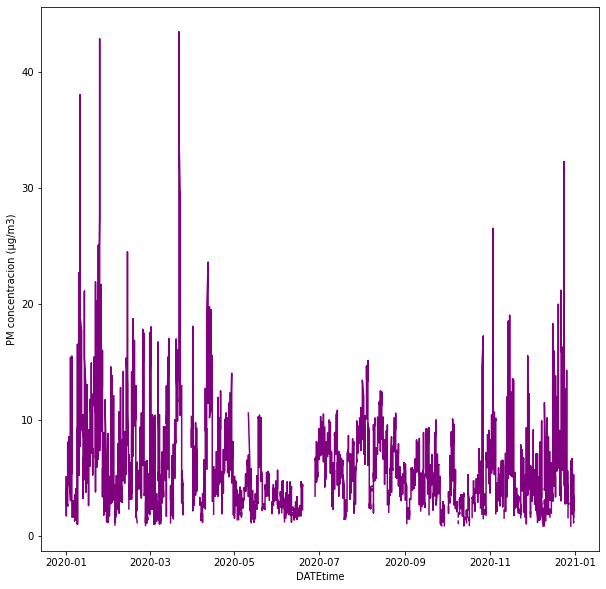

In [4]:
pm(data["datetime"].dt.date,data["PM2.5"],"purple")

In [ ]:
plt.boxplot(data['PM2.5'])
#plt.plot(data['PM2.5'])

Text(0.5, 1.0, 'PM concentation during the day')

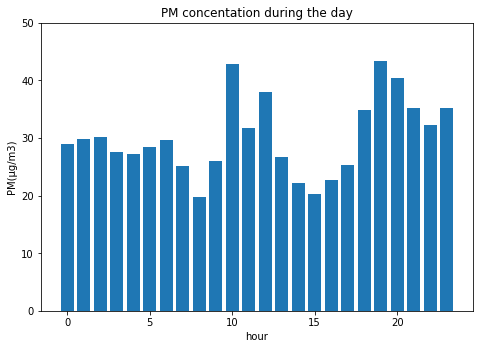

In [18]:
#PM concentation during the day
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(data['hour'],data["PM2.5"])
plt.xlabel("hour")
plt.ylabel("PM(μg/m3)")
plt.ylim(0, 50)
plt.title("PM concentation during the day")

Text(0.5, 1.0, 'PM concentation during the year')

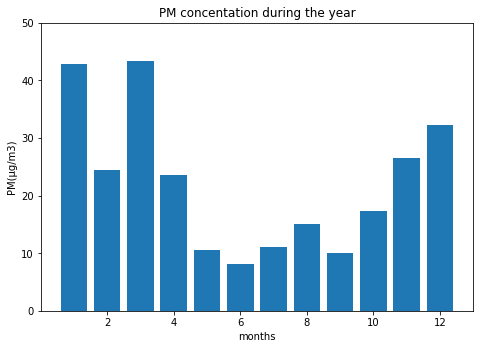

In [13]:
#PM concentation during the year
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(data['month'],data["PM2.5"])
plt.xlabel("months")
plt.ylabel("PM(μg/m3)")
plt.ylim(0, 50)
plt.title("PM concentation during the year")

In [16]:
statistics("PM2.5")

the min value is 0.8557
the max value is 43.45196
the mean value is 5.882247079078079
the standard deviation value is 3.8278516810235


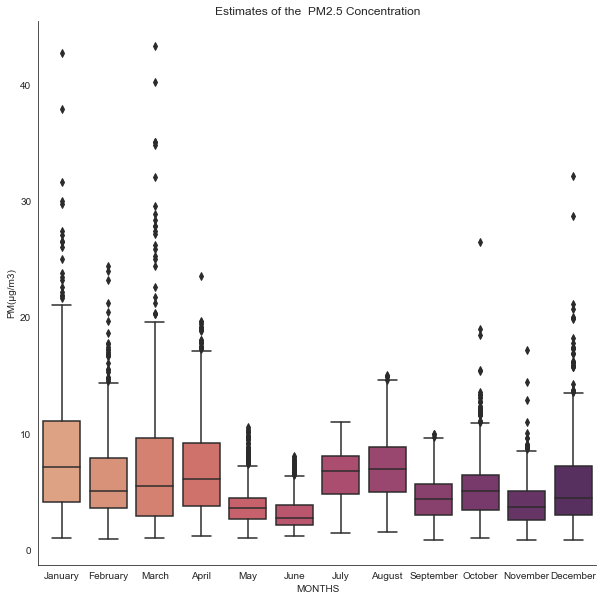

In [92]:
combined_dfs = pd.DataFrame({'January': January['PM2.5'],
                             'February': February['PM2.5'],
                             'March': March['PM2.5'],
                             'April': April['PM2.5'],
                             'May': May['PM2.5'],
                             'June': June['PM2.5'],
                             'July': July['PM2.5'],
                             'August': August['PM2.5'],
                             'September': September['PM2.5'],
                             'October': October['PM2.5'],
                             'November': November['PM2.5'],
                             'December': December['PM2.5'],})
plt.figure(figsize=(10,10))
plt.title("Estimates of the  PM2.5 Concentration")
sns.set_style('white')
plt.xlabel('MONTHS')
plt.ylabel('PM(μg/m3)')
sns.boxplot(data=combined_dfs, palette='flare')
sns.despine()
plt.show()

In [ ]:
#PM concentation during the year
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar((data['month'].),data["PM2.5"])
plt.xlabel("months")
plt.ylabel("PM(μg/m3)")
plt.ylim(0, 50)
plt.title("PM concentation during the year")

In [99]:
cold = data[data['month'].eq(11) | data["month"].eq(12)| data["month"].eq(1)| data["month"].eq(2)| data["month"].eq(3)]
print(cold)

                datetime     PM2.5  month  hour
0    2020-01-01 00:00:00  4.061770      1     0
1    2020-01-01 01:00:00  3.522560      1     1
2    2020-01-01 02:00:00  2.972290      1     2
3    2020-01-01 03:00:00  2.924620      1     3
4    2020-01-01 04:00:00  3.846485      1     4
...                  ...       ...    ...   ...
8779 2020-12-31 19:00:00  5.299247     12    19
8780 2020-12-31 20:00:00  3.286940     12    20
8781 2020-12-31 21:00:00  2.117047     12    21
8782 2020-12-31 22:00:00  3.290510     12    22
8783 2020-12-31 23:00:00  2.203778     12    23

[3647 rows x 4 columns]


Text(0.5, 1.0, 'PM concentation during the cold period')

<Figure size 720x720 with 0 Axes>

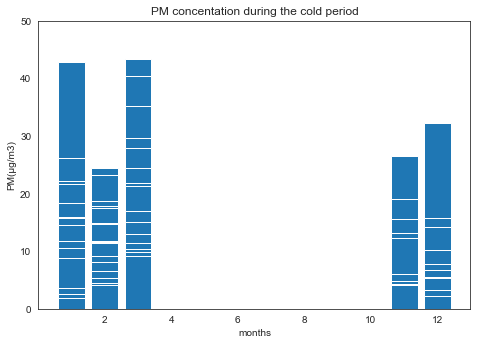

In [103]:
plt.figure(figsize=(10,10))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(cold['month'],cold["PM2.5"])
plt.xlabel("months")
plt.ylabel("PM(μg/m3)")
plt.ylim(0, 50)
plt.title("PM concentation during the cold period")

In [83]:
warm = data[data["month"].between(4,10)]
print(warm)

                datetime     PM2.5  month  hour
2183 2020-04-01 00:00:00   9.33368      4     0
2184 2020-04-01 01:00:00   8.97605      4     1
2185 2020-04-01 02:00:00   9.26578      4     2
2186 2020-04-01 03:00:00   9.82354      4     3
2187 2020-04-01 04:00:00  10.02199      4     4
...                  ...       ...    ...   ...
7315 2020-10-31 19:00:00   6.02387     10    19
7316 2020-10-31 20:00:00   6.91497     10    20
7317 2020-10-31 21:00:00   6.70672     10    21
7318 2020-10-31 22:00:00   6.42805     10    22
7319 2020-10-31 23:00:00   6.06958     10    23

[5137 rows x 4 columns]


Text(0.5, 1.0, 'PM concentation during the warm period')

<Figure size 720x720 with 0 Axes>

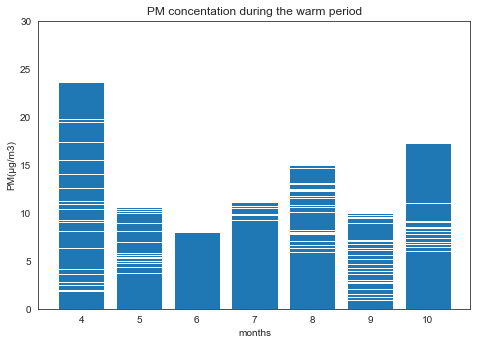

In [102]:
plt.figure(figsize=(10,10))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(warm['month'],warm["PM2.5"])
plt.xlabel("months")
plt.ylabel("PM(μg/m3)")
plt.ylim(0, 30)
plt.title("PM concentation during the warm period")